The IMDB dataset

Loading the IMDB dataset

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

Decoding reviews back to text

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


Preparing the data

Encoding the integer sequences via multi-hot encoding

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Building your model

Model definition

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the model

In [12]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Validating your approach

Setting aside a validation set

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5266 - accuracy: 0.7799 - val_loss: 0.3856 - val_accuracy: 0.8723
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3057 - accuracy: 0.9024 - val_loss: 0.3040 - val_accuracy: 0.8890
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2233 - accuracy: 0.9279 - val_loss: 0.3142 - val_accuracy: 0.8720
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1784 - accuracy: 0.9424 - val_loss: 0.2752 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1468 - accuracy: 0.9527 - val_loss: 0.3019 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1238 - accuracy: 0.9600 - val_loss: 0.2898 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0977 - accuracy: 0.9711 - val_loss: 0.3273 - val_accuracy: 0.8806
Epoch 8/20
30

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

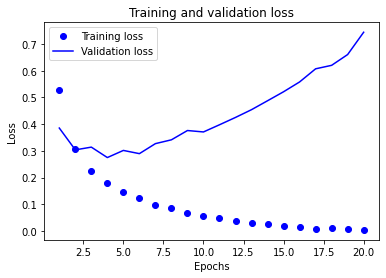

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

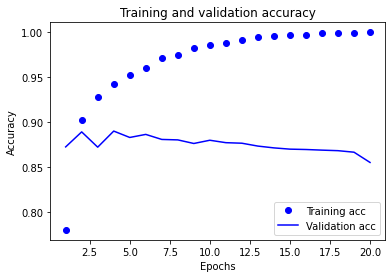

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4642 - accuracy: 0.8262
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2676 - accuracy: 0.9068
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2051 - accuracy: 0.9286
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2940 - accuracy: 0.8842


In [19]:
results

[0.29403242468833923, 0.8842399716377258]

In [20]:
model.predict(x_test)

array([[0.25156042],
       [0.99974823],
       [0.9200256 ],
       ...,
       [0.14348918],
       [0.10752928],
       [0.66464597]], dtype=float32)

In [21]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [22]:
len(train_data)

8982

In [23]:
len(test_data)

2246

In [24]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [25]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [26]:
train_labels[10]

3

Preparing the data

Encoding the input data

In [27]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Encoding the labels

In [28]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [29]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Building your model

Model definition

In [30]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

Compiling the model

In [31]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Validating your approach

Setting aside a validation set

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Training the model

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 78ms/step - loss: 2.6408 - accuracy: 0.4451 - val_loss: 1.7756 - val_accuracy: 0.6120
Epoch 2/20
16/16 [==============================] - 1s 83ms/step - loss: 1.4557 - accuracy: 0.6948 - val_loss: 1.3277 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 1s 79ms/step - loss: 1.0758 - accuracy: 0.7730 - val_loss: 1.1878 - val_accuracy: 0.7310
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.8448 - accuracy: 0.8242 - val_loss: 1.0447 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6754 - accuracy: 0.8599 - val_loss: 0.9838 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5434 - accuracy: 0.8876 - val_loss: 0.9327 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4378 - accuracy: 0.9092 - val_loss: 0.8971 - val_accuracy: 0.8040
Epoch 8/20
16

Plotting the training and validation loss

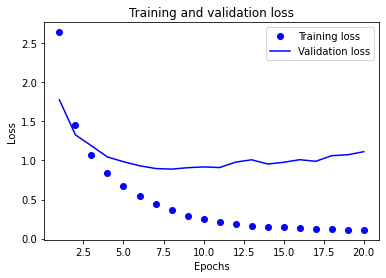

In [34]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

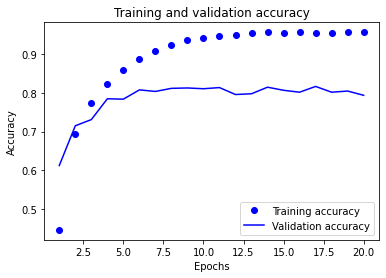

In [35]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [36]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 48ms/step - loss: 2.5982 - accuracy: 0.5366
Epoch 2/9
18/18 [==============================] - 1s 49ms/step - loss: 1.4090 - accuracy: 0.7098
Epoch 3/9
18/18 [==============================] - 1s 47ms/step - loss: 1.0298 - accuracy: 0.7843
Epoch 4/9
18/18 [==============================] - 1s 47ms/step - loss: 0.7963 - accuracy: 0.8334
Epoch 5/9
18/18 [==============================] - 1s 46ms/step - loss: 0.6279 - accuracy: 0.8693
Epoch 6/9
18/18 [==============================] - 1s 49ms/step - loss: 0.5004 - accuracy: 0.8956
Epoch 7/9
18/18 [==============================] - 1s 49ms/step - loss: 0.3995 - accuracy: 0.9159
Epoch 8/9
18/18 [==============================] - 1s 47ms/step - loss: 0.3286 - accuracy: 0.9276
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9590 - accuracy: 0.7907


In [37]:
results

[0.9590482115745544, 0.790739119052887]

In [38]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18076580587711488

Generating predictions on new data

In [39]:
predictions = model.predict(x_test)

In [40]:
predictions[0].shape

(46,)

In [41]:
np.sum(predictions[0])

0.9999999

In [42]:
np.argmax(predictions[0])

4

A different way to handle the labels and the loss

In [43]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [44]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

The importance of having sufficiently large intermediate layers

A model with an information bottleneck

In [45]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 2.8427 - accuracy: 0.2187 - val_loss: 2.1095 - val_accuracy: 0.2620
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 1.7464 - accuracy: 0.5672 - val_loss: 1.5602 - val_accuracy: 0.6380
Epoch 3/20
63/63 [==============================] - 1s 19ms/step - loss: 1.3379 - accuracy: 0.6586 - val_loss: 1.3831 - val_accuracy: 0.6640
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1.1298 - accuracy: 0.7086 - val_loss: 1.3029 - val_accuracy: 0.7010
Epoch 5/20
63/63 [==============================] - 1s 20ms/step - loss: 0.9960 - accuracy: 0.7538 - val_loss: 1.2639 - val_accuracy: 0.7140
Epoch 6/20
63/63 [==============================] - 1s 20ms/step - loss: 0.9041 - accuracy: 0.7699 - val_loss: 1.2720 - val_accuracy: 0.7240
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.8311 - accuracy: 0.7885 - val_loss: 1.2691 - val_accuracy: 0.7320
Epoch 8/20
63

Predicting house prices: A regression example

The Boston Housing Price dataset

Loading the Boston housing dataset

In [49]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [50]:
train_data.shape

(404, 13)

In [51]:
test_data.shape

(102, 13)

In [52]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

Preparing the data

Normalizing the data

In [53]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Building your model

Model definition

In [54]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

Validating your approach using K-fold validation

K-fold validation

In [55]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [56]:
all_scores

[2.088658094406128, 2.4179880619049072, 2.401080846786499, 2.5364089012145996]

In [57]:
np.mean(all_scores)

2.3610339760780334

Saving the validation logs at each fold

In [58]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


Building the history of successive mean K-fold validation scores

In [59]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Plotting validation scores

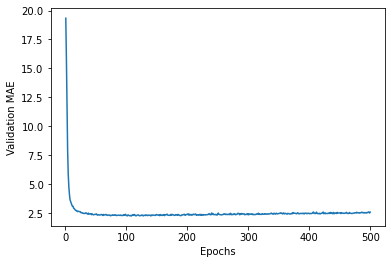

In [60]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

Plotting validation scores, excluding the first 10 data points

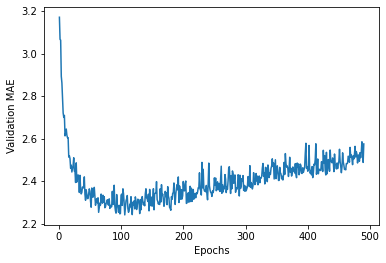

In [61]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

Training the final model

In [62]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 13.9729 - mae: 2.5402


In [63]:
test_mae_score

2.5402138233184814

Generating predictions on new data

In [64]:
predictions = model.predict(test_data)
predictions[0]

array([7.0924926], dtype=float32)